In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 25000)

## read .txt

### download txt file

In [3]:
!wget https://www.gutenberg.org/ebooks/66446.txt.utf-8

--2021-10-16 10:27:25--  https://www.gutenberg.org/ebooks/66446.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/66446/pg66446.txt [following]
--2021-10-16 10:27:25--  https://www.gutenberg.org/cache/epub/66446/pg66446.txt
Reusing existing connection to www.gutenberg.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 48996 (48K) [text/plain]
Saving to: ‘66446.txt.utf-8’

66446.txt.utf-8     100%[===================>]  47.85K  --.-KB/s    in 0.1s    

2021-10-16 10:27:26 (382 KB/s) - ‘66446.txt.utf-8’ saved [48996/48996]



In [4]:
!cp /content/66446.txt.utf-8 book.txt

### we use "The Plymouth Express Affair" as book.

In [5]:
filename = 'book.txt'

### read first 5 line

In [6]:
with open(filename , mode='r') as file:
    print(''.join(file.readlines()[:5]))

﻿The Project Gutenberg eBook of The Plymouth Express Affair, by Agatha
Christie

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions



### read file as array of words

#### we use first 50 line

In [7]:
book_vocs = []
with open(filename , mode='r') as file:
    lines = file.readlines()
    print(f"text file contain {len(lines)} lines \n\n")
    
    for i, line in enumerate(lines) :
        if i >= 50:
          break
        book_vocs.append(line.split())

book_vocs[26:36]

text file contain 1090 lines 




[[],
 ['THE', 'PLYMOUTH', 'EXPRESS', 'AFFAIR'],
 [],
 ['“The',
  'little',
  'gray',
  'cells,”',
  'so',
  'often',
  'referred',
  'to',
  'by',
  'the',
  'great'],
 ['detective',
  'Hercule',
  'Poirot,',
  'certainly',
  'get',
  'in',
  'their',
  'fine-work'],
 ['in', 'this', 'intriguing', 'mystery', 'story', 'by', 'an', 'exceptionally'],
 ['talented', 'writer.'],
 [],
 ['By', 'Agatha', 'Christie'],
 []]

## read csv

In [8]:
filename = 'country_vaccinations.csv'
data = pd.read_csv(filename)
data.head()

country  ...                                     source_website
0  Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1  Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2  Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3  Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4  Afghanistan  ...  https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...

[5 rows x 15 columns]

### drop nan and duplicates

- remove duplicate rows
- remove all nans

In [9]:
data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     20900
people_vaccinated                      22038
people_fully_vaccinated                24936
daily_vaccinations_raw                 25384
daily_vaccinations                       307
total_vaccinations_per_hundred         20900
people_vaccinated_per_hundred          22038
people_fully_vaccinated_per_hundred    24936
daily_vaccinations_per_million           307
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

The number of nans in any column is not equal to the total number of records. We have no full null columns. So no column is deleted due to nan deletion.

'people_vaccinated' and 'daily_vaccinations_raw' are important in this analysis for us. we need to see nan value in this columns to remove records.

In [10]:
data.dropna(subset=['people_vaccinated', 'daily_vaccinations_raw'], how='any').isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                1938
daily_vaccinations_raw                    0
daily_vaccinations                        0
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred             0
people_fully_vaccinated_per_hundred    1938
daily_vaccinations_per_million            0
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

total_vaccinations and people_vaccinated are not same. 17523 records from 17645 have different total_vaccinations and people_vaccinated.

In [11]:
len(data.dropna()[data.dropna()['total_vaccinations']!=data.dropna()['people_vaccinated']])

17523

In [12]:
len(data.dropna()[data.dropna()['total_vaccinations']>data.dropna()['people_vaccinated']])

17523

In [13]:
len(data.dropna()[data.dropna()['total_vaccinations']==data.dropna()['people_vaccinated']])

122

In [14]:
len(data.dropna()[data.dropna()['total_vaccinations']<data.dropna()['people_vaccinated']])

0

In [15]:
len(data.dropna())

17645

daily_vaccinations and daily_vaccinations_raw are not same. 17621 records from 17645 have different daily_vaccinations_raw and daily_vaccinations.

In [16]:
len(data.dropna()[data.dropna()['daily_vaccinations']!=data.dropna()['daily_vaccinations_raw']])

17621

In [17]:
len(data.dropna()[data.dropna()['daily_vaccinations']<data.dropna()['daily_vaccinations_raw']])

9940

In [18]:
len(data.dropna()[data.dropna()['daily_vaccinations']>data.dropna()['daily_vaccinations_raw']])

7681

- try find total vaccinations from cumsum of daily vaccination data
- some days data is not in table. cumsum result is not equal with table data for some days without Nan.
- some days daily vaccination data is not correct. cumsum of daily data is bigger than total vaccination.
- we can not use cumsum to fill nan in vaccinations cells.

In [19]:
data[data['country']=='Iran']['daily_vaccinations'].cumsum().head(25)

19243        NaN
19244     3000.0
19245     4938.0
19246     6521.0
19247     7927.0
19248     9227.0
19249    10456.0
19250    11635.0
19251    12510.0
19252    13385.0
19253    14679.0
19254    16392.0
19255    18523.0
19256    21073.0
19257    24042.0
19258    27430.0
19259    31236.0
19260    35042.0
19261    38848.0
19262    42654.0
19263    46460.0
19264    50266.0
19265    54072.0
19266    57878.0
19267    61684.0
Name: daily_vaccinations, dtype: float64

In [20]:
data[data['country']=='Iran']['daily_vaccinations_raw'].cumsum().head(25)

19243       NaN
19244    3000.0
19245       NaN
19246       NaN
19247       NaN
19248       NaN
19249       NaN
19250       NaN
19251       NaN
19252       NaN
19253       NaN
19254       NaN
19255       NaN
19256       NaN
19257       NaN
19258       NaN
19259       NaN
19260       NaN
19261       NaN
19262       NaN
19263       NaN
19264       NaN
19265       NaN
19266       NaN
19267       NaN
Name: daily_vaccinations_raw, dtype: float64

In [21]:
data[data['country']=='Iran'].head(25)

country iso_code  ...                source_name            source_website
19243    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19244    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19245    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19246    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19247    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19248    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19249    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19250    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19251    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19252    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19253    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19254    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19255    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19256    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19257    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19258    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19259    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19260    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19261    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19262    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19263    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19264    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19265    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19266    Iran      IRN  ...  World Health Organization  https://covid19.who.int/
19267    Iran      IRN  ...  World Health Organization  https://covid19.who.int/

[25 rows x 15 columns]

- in total vaccination and people vaccinated data, we need real min and max value and real data for countries to answer questions. we can not fill nan value for these columns with estimations.
- for daily vaccination data, we need real min and max value and real data for countries to answer questions. we can not fill nan value for these columns with estimations.
- estimation can make unreal data.
- estimation and interpolation predict and complete the plot of changes in the data.
- Here we are looking for specific statistics and specific intervals for response. We add new and unrealistic forecasting and interpolation data that can confuse these statistics. It can also cause records to be incorrectly placed in the desired intervals or capture the values ​​of the statistics being examined.
- it make answer records unreal.
- It can lead to incorrect answers to questions based on this unrealistic data.

The records that are exactly the same are duplicates. Records that have the same data in all columns.

We do not have two columns with exactly the same data. So in deleting duplicate data, no feature is deleted.



In [22]:
clean_data = data.dropna(subset=['people_vaccinated', 'daily_vaccinations_raw']).drop_duplicates()
clean_data.shape

(19583, 15)

In [23]:
data.shape

(45984, 15)

### The number of columns does not change, some rows are removed.

In [24]:
print('dropna change num of rows : ', data.shape[0]-data.dropna().shape[0])
print('dropna change num of columns : ', data.shape[1]-data.dropna().shape[1])
print('drop_duplicates change num of rows : ', data.shape[0]-data.drop_duplicates().shape[0])
print('drop_duplicates change num of columns : ', data.shape[1]-data.drop_duplicates().shape[1])

dropna change num of rows :  28339
dropna change num of columns :  0
drop_duplicates change num of rows :  0
drop_duplicates change num of columns :  0


## read log

In [25]:
!head -5 git.log

1502826583#Linus Torvalds
1501749089#Adrian Hunter
1501749088#Adrian Hunter
1501882480#Kees Cook
1497271395#Rob Clark


In [26]:
!sed -n '574028p' git.log

1230066652#\"J. Bruce Fields\


- encoding is not utf8. use latin
- seprator is #
- style is "timestamp#author"

In [27]:
git_log = pd.read_csv("git.log",sep="#",encoding='latin-1',header=None,names=['timestamp', 'author'])
# Printing out the first 5 rows
git_log.head()

timestamp          author
0  1502826583  Linus Torvalds
1  1501749089   Adrian Hunter
2  1501749088   Adrian Hunter
3  1501882480       Kees Cook
4  1497271395       Rob Clark

### we have one row with author = nan

In [28]:
 git_log.isnull().any()

timestamp    False
author        True
dtype: bool

In [29]:
git_log[git_log.isnull().any(axis=1)]

timestamp author
694554  1120285620    NaN

### we clean dataset with remove nans

In [30]:
clean_git_log = git_log.dropna()

### unique author names

for nique author name, we can not use nan author, we use clean git lot dataframe.

In [31]:
uniq_authors_log = list(set(clean_git_log['author']))
print('unique author names, first 5 name:')
for i, v in enumerate(uniq_authors_log[:5]):
  print(str(i+1)+'.', v)

unique author names, first 5 name:
1. Hideo Aoki
2. Stuart Auchterlonie
3. Jean Delvare
4. Calin Cruceru
5. Heiko Stuebner


## statistics

### txt file

In [32]:
print('num of all vocabs : ', sum([len(i) for i in book_vocs]))

num of all vocabs :  258


In [33]:
import itertools

print('num of unique vocabs : ', len(set(list(itertools.chain(*book_vocs)))))

num of unique vocabs :  183


### csv file

#### all columns stats

In [34]:
clean_data.describe()

total_vaccinations  ...  daily_vaccinations_per_million
count        1.958300e+04  ...                    19583.000000
mean         1.550877e+07  ...                     4465.563652
std          5.587797e+07  ...                     4503.267423
min          0.000000e+00  ...                        0.000000
25%          3.759290e+05  ...                     1429.000000
50%          1.976748e+06  ...                     3375.000000
75%          9.344139e+06  ...                     6603.000000
max          2.174043e+09  ...                   117497.000000

[8 rows x 9 columns]

#### create vac_first column

In [35]:
clean_data['vac_first'] = clean_data['vaccines'].str.split(',',expand=True)[0]
clean_data.head()

country  ...           vac_first
94   Afghanistan  ...     Johnson&Johnson
101  Afghanistan  ...     Johnson&Johnson
210      Albania  ...  Oxford/AstraZeneca
211      Albania  ...  Oxford/AstraZeneca
212      Albania  ...  Oxford/AstraZeneca

[5 rows x 16 columns]

### country with max and min people_vaccinated

In [36]:
min_people_vaccinated = clean_data['people_vaccinated'].min()
max_people_vaccinated = clean_data['people_vaccinated'].max()

print('min_people_vaccinated', min_people_vaccinated, 'max_people_vaccinated', max_people_vaccinated)

print('country with min people_vaccinated: ',
      list(clean_data[clean_data['people_vaccinated']==min_people_vaccinated]['country']))
print('country with max people_vaccinated: ',
      list(clean_data[clean_data['people_vaccinated']==max_people_vaccinated]['country']))

min_people_vaccinated 0.0 max_people_vaccinated 1100842000.0
country with min people_vaccinated:  ['Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Liechtenstein', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway', 'Norway']
country with max people_vaccinated:  ['China']


### zero daily vaccination

we consider the raw number of vaccinations

In [37]:
count_day_without_vaccin_in_countries = clean_data[clean_data['daily_vaccinations_raw']==0].groupby('country').count()
max_day_without_vaccin_in_countries = count_day_without_vaccin_in_countries.sort_values('date', ascending=False).max()['date']
print('max_day_without_vaccin_in_countries : ', max_day_without_vaccin_in_countries)
count_day_without_vaccin_in_countries[count_day_without_vaccin_in_countries['date']==max_day_without_vaccin_in_countries].index

max_day_without_vaccin_in_countries :  121


Index(['Liechtenstein'], dtype='object', name='country')

### 20M daily vaccination

In [38]:
clean_data[clean_data['daily_vaccinations_raw']>20e6].groupby('country').count().sort_values('date').index

Index(['China'], dtype='object', name='country')

### rate of first vaccin in each country

In all records of a country, the first vaccine and the set of vaccines are the same. So the rate of the first vaccine in each country is equal to the ratio of one to the number of vaccines in that country.

In [39]:
def item_first_vacc_rate(df):
    return 1/float(len(str(df['vaccines']).split(',')))
clean_data['first_vacc_rate']=clean_data.apply(item_first_vacc_rate, axis = 1)

clean_data.groupby('country').max()['first_vacc_rate']


country
Afghanistan                         0.250000
Albania                             0.250000
Algeria                             0.333333
Andorra                             0.500000
Anguilla                            1.000000
Antigua and Barbuda                 1.000000
Argentina                           0.166667
Aruba                               1.000000
Australia                           0.500000
Austria                             0.250000
Azerbaijan                          0.333333
Bahamas                             1.000000
Bahrain                             0.250000
Bangladesh                          0.250000
Barbados                            0.333333
Belgium                             0.250000
Belize                              0.500000
Bhutan                              0.250000
Bolivia                             0.200000
Bosnia and Herzegovina              0.250000
Botswana                            0.250000
Brazil                              0.250000
Br

## log file

### count of commit for each author

In [40]:
git_log_count = git_log.groupby(['author'])['timestamp'].count().reset_index(
    name="count").sort_values('count', ascending=False)
git_log_count['rate'] = git_log_count['count']/git_log_count['count'].sum()
git_log_count

author  count      rate
8605                                      Linus Torvalds  23361  0.033417
3586                                     David S. Miller   9106  0.013026
9257                                          Mark Brown   6802  0.009730
14360                                       Takashi Iwai   6209  0.008882
269                                              Al Viro   6006  0.008591
5385                                   H Hartley Sweeten   5938  0.008494
6079                                         Ingo Molnar   5344  0.007644
9793                               Mauro Carvalho Chehab   5204  0.007444
1437                                       Arnd Bergmann   4890  0.006995
5219                                  Greg Kroah-Hartman   4580  0.006552
12823                                       Russell King   4242  0.006068
7122                                       Johannes Berg   4065  0.005815
14451                                          Tejun Heo   4038  0.005776
14556                                    Thomas Gleixner   3788  0.005419
2775                                   Christoph Hellwig   3502  0.005010
5479                                        Hans Verkuil   3461  0.004951
2697                                        Chris Wilson   3199  0.004576
4990                                  Geert Uytterhoeven   3064  0.004383
3123                                       Dan Carpenter   3010  0.004306
12027                                  Rafael J. Wysocki   3004  0.004297
4321                                        Eric Dumazet   2978  0.004260
7052                                         Joe Perches   2937  0.004201
3297                                       Daniel Vetter   2886  0.004128
393                                         Alex Deucher   2798  0.004002
8400                                    Laurent Pinchart   2764  0.003954
15036                                    Trond Myklebust   2696  0.003857
1661                                            Axel Lin   2673  0.003824
3368                                         Dave Airlie   2625  0.003755
11078                                     Olof Johansson   2614  0.003739
1427                            Arnaldo Carvalho de Melo   2562  0.003665
11359                                         Paul Mundt   2545  0.003641
1835                                          Ben Skeggs   2518  0.003602
8606                                       Linus Walleij   2401  0.003435
1747                           Bartlomiej Zolnierkiewicz   2340  0.003347
8263                                   Kuninori Morimoto   2323  0.003323
11635                                     Peter Zijlstra   2275  0.003254
8370                                  Lars-Peter Clausen   2263  0.003237
12114                                       Ralf Baechle   2152  0.003078
12899                                       Sachin Kamat   2065  0.002954
15366                                      Ville Syrjälä   2058  0.002944
279                                             Alan Cox   2055  0.002940
7561                                        Julia Lawall   1991  0.002848
167                                          Adrian Bunk   1924  0.002752
3508                                       David Howells   1918  0.002744
6971                                          Jingoo Han   1840  0.002632
13966                                  Stephen Hemminger   1825  0.002611
6623                                        Jean Delvare   1814  0.002595
7106                                        Johan Hovold   1796  0.002569
12169                                       Randy Dunlap   1788  0.002558
2024                                       Bjorn Helgaas   1768  0.002529
1060                                       Andrew Morton   1759  0.002516
10710                                          NeilBrown   1728  0.002472
823                                           Andi Kleen   1726  0.002469
11327                                   Paul E. McKenn

### 5 most commited author

In [41]:
git_log_count.head(5)

author  count      rate
8605    Linus Torvalds  23361  0.033417
3586   David S. Miller   9106  0.013026
9257        Mark Brown   6802  0.009730
14360     Takashi Iwai   6209  0.008882
269            Al Viro   6006  0.008591

### visualizing the commits over the years

- For our analysis, we want to visualize the contributions over time. For this, we use the information in the timestamp column to create a time series-based column.

- We want to examine the trend of changes in the amount of committees in this project.


In [42]:
# converting the timestamp column
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit="s")

In [43]:
# summarizing the converted timestamp column
git_log['timestamp'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  699071
unique                 668448
top       2008-09-04 05:30:19
freq                       99
first     1970-01-01 00:00:01
last      2037-04-25 08:08:26
Name: timestamp, dtype: object

As we can see from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the timestamp column by dropping the rows with the incorrect timestamps.

In [44]:
# determining the first real commit timestamp
first_commit_timestamp = git_log.iloc[-1]['timestamp']

# determining the last sensible commit timestamp
last_commit_timestamp = pd.to_datetime('2018')

# filtering out wrong timestamps
corrected_log = git_log[
    (git_log['timestamp'] >= first_commit_timestamp) &
    (git_log['timestamp'] <= last_commit_timestamp)]

# summarizing the corrected timestamp column
corrected_log['timestamp'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  del sys.path[0]


count                  698569
unique                 667977
top       2008-09-04 05:30:19
freq                       99
first     2005-04-16 22:20:36
last      2017-10-03 12:57:00
Name: timestamp, dtype: object

To find out how the development activity has increased over time, we'll group the commits by year and count them up.

In [45]:
# Counting the no. commits per year
commits_per_year = corrected_log.groupby(
    pd.Grouper(key='timestamp', freq='AS')).count()

# Listing the first rows
commits_per_year.head()

author
timestamp         
2005-01-01   16229
2006-01-01   29255
2007-01-01   33759
2008-01-01   48847
2009-01-01   52572

Finally, we'll make a plot out of these counts to better see how the development effort on Linux has increased over the the last few years.

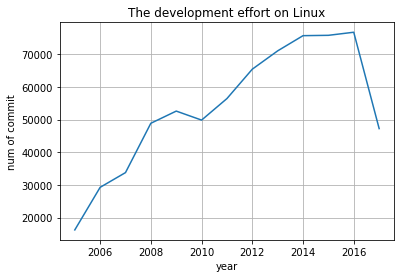

In [46]:
plt.plot(commits_per_year['author'])
plt.title('The development effort on Linux')
plt.ylabel('num of commit')
plt.xlabel('year')
plt.grid()

many other developers are now able to contribute to the Linux kernel as well. There is no decrease of development activity at insight!

- After 10 years of development of this project, the trend of increasing the number of committees can be seen. That is, after a long time of development, participation in development is still on the rise.


- In project development, all the basic requirements are developed first. After that, participation is made in improving performance and eliminating shortcomings. In developing basic needs, we see an increase in the number of committees at different intervals. At this time, the number of committees is changing steadily. At times, the change in the number of committees can be constant or decreasing. The point is that the reduction in the number of committees at this time is not significant. In the second phase of development, the number of committees decreases significantly and the process of changing the number of committees at this time may not be continuous.

- The number of committees has increased over the years. The number of committees has not decreased too much. (Last year decrease may be due to deleted committees due to incorrect time)

- This evidence indicates that the first phase of development is not yet complete or is in its final years.

- If the recent decline is not due to data deletion, we are in the final years of basic needs development. This decline will continue in the last years of development until the number of committees decreases significantly. This means that in the project, we can participate in the development of the needs of the project owners.

## Linking two tables

#### read case-death table with good index

- we use WHO data from https://covid19.who.int/info/ page to see datasets.
- we download case-death table from https://covid19.who.int/WHO-COVID-19-global-data.csv

In [47]:
case_death = pd.read_csv('WHO-COVID-19-global-data.csv', index_col=['Date_reported','Country'])
case_death.head()

Country_code  ... Cumulative_deaths
Date_reported Country                   ...                  
2020-01-03    Afghanistan           AF  ...                 0
2020-01-04    Afghanistan           AF  ...                 0
2020-01-05    Afghanistan           AF  ...                 0
2020-01-06    Afghanistan           AF  ...                 0
2020-01-07    Afghanistan           AF  ...                 0

[5 rows x 6 columns]

In [48]:
case_death.isna().any(axis=0)

Country_code          True
WHO_region           False
New_cases            False
Cumulative_cases     False
New_deaths           False
Cumulative_deaths    False
dtype: bool

country code is not important in my analysis. we do not need to remove Nan in country code.

In [49]:
case_death.index

MultiIndex([('2020-01-03', 'Afghanistan'),
            ('2020-01-04', 'Afghanistan'),
            ('2020-01-05', 'Afghanistan'),
            ('2020-01-06', 'Afghanistan'),
            ('2020-01-07', 'Afghanistan'),
            ('2020-01-08', 'Afghanistan'),
            ('2020-01-09', 'Afghanistan'),
            ('2020-01-10', 'Afghanistan'),
            ('2020-01-11', 'Afghanistan'),
            ('2020-01-12', 'Afghanistan'),
            ...
            ('2021-09-22',    'Zimbabwe'),
            ('2021-09-23',    'Zimbabwe'),
            ('2021-09-24',    'Zimbabwe'),
            ('2021-09-25',    'Zimbabwe'),
            ('2021-09-26',    'Zimbabwe'),
            ('2021-09-27',    'Zimbabwe'),
            ('2021-09-28',    'Zimbabwe'),
            ('2021-09-29',    'Zimbabwe'),
            ('2021-09-30',    'Zimbabwe'),
            ('2021-10-01',    'Zimbabwe')],
           names=['Date_reported', 'Country'], length=151206)

#### index vaccin table like case-death table

In [50]:
clean_data.groupby(['date','country']).count().index

MultiIndex([('2020-12-03',               'Norway'),
            ('2020-12-04',               'Norway'),
            ('2020-12-05',               'Norway'),
            ('2020-12-06',               'Norway'),
            ('2020-12-07',               'Norway'),
            ('2020-12-08',               'Norway'),
            ('2020-12-09',              'England'),
            ('2020-12-09',               'Norway'),
            ('2020-12-09',             'Scotland'),
            ('2020-12-10',              'England'),
            ...
            ('2021-09-20',            'Sri Lanka'),
            ('2021-09-20',             'Suriname'),
            ('2021-09-20',             'Thailand'),
            ('2021-09-20',  'Trinidad and Tobago'),
            ('2021-09-20',               'Turkey'),
            ('2021-09-20',              'Ukraine'),
            ('2021-09-20', 'United Arab Emirates'),
            ('2021-09-20',        'United States'),
            ('2021-09-20',              'Uruguay

#### keep rows with index in intersection of two table

In [51]:
indexs = clean_data.groupby(['date','country']).count().index.intersection(case_death.index)
case_death_ins = case_death.loc[indexs,:]
case_death_ins.shape

(16251, 6)

In [52]:
clean_data_ins = clean_data.set_index(['date', 'country']).loc[indexs,:]
clean_data_ins.shape

(16251, 15)

#### intersection indexs

In [53]:
indexs

MultiIndex([('2020-12-03',               'Norway'),
            ('2020-12-04',               'Norway'),
            ('2020-12-05',               'Norway'),
            ('2020-12-06',               'Norway'),
            ('2020-12-07',               'Norway'),
            ('2020-12-08',               'Norway'),
            ('2020-12-09',               'Norway'),
            ('2020-12-10',               'Norway'),
            ('2020-12-11',               'Norway'),
            ('2020-12-12',               'Norway'),
            ...
            ('2021-09-20',             'Slovenia'),
            ('2021-09-20',            'Sri Lanka'),
            ('2021-09-20',             'Suriname'),
            ('2021-09-20',             'Thailand'),
            ('2021-09-20',  'Trinidad and Tobago'),
            ('2021-09-20',               'Turkey'),
            ('2021-09-20',              'Ukraine'),
            ('2021-09-20', 'United Arab Emirates'),
            ('2021-09-20',              'Uruguay

we like Suriname stats and football!

#### join two table with country index = Suriname

In [54]:
joined_table = clean_data_ins.xs('Suriname', level=1, drop_level=True).join(
case_death_ins.xs('Suriname', level=1, drop_level=True))

joined_table.head(1)

iso_code  total_vaccinations  ...  New_deaths  Cumulative_deaths
2021-03-20      SUR             11879.0  ...           0                176

[1 rows x 21 columns]

#### draw injection and casses trends

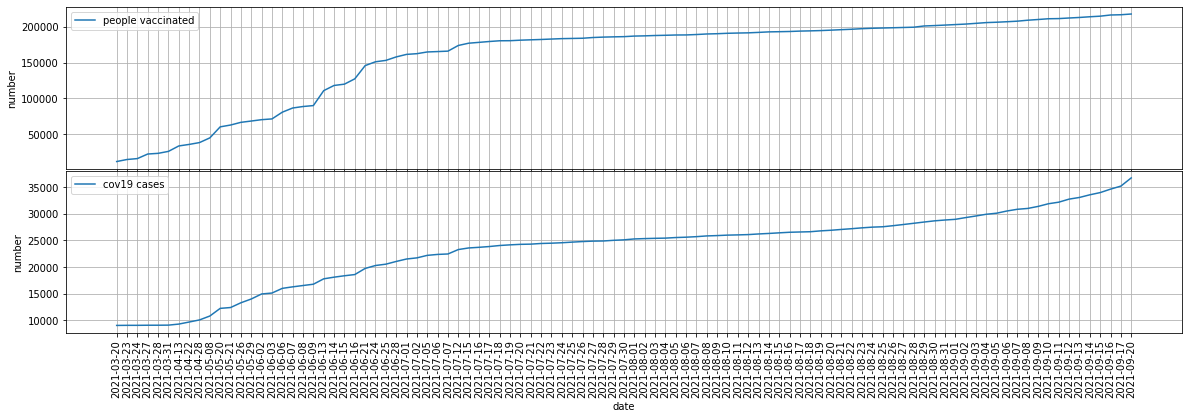

In [55]:
plt.figure(figsize=(20,6))
plt.subplot(2,1,1)
plt.plot(joined_table['people_vaccinated'])
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = .01)
plt.ylabel('number')
plt.legend(labels=['people vaccinated'])
plt.grid()
plt.subplot(2,1,2)
plt.plot(joined_table['Cumulative_cases'])
plt.legend(labels=['cov19 cases'])
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('number')
plt.grid();

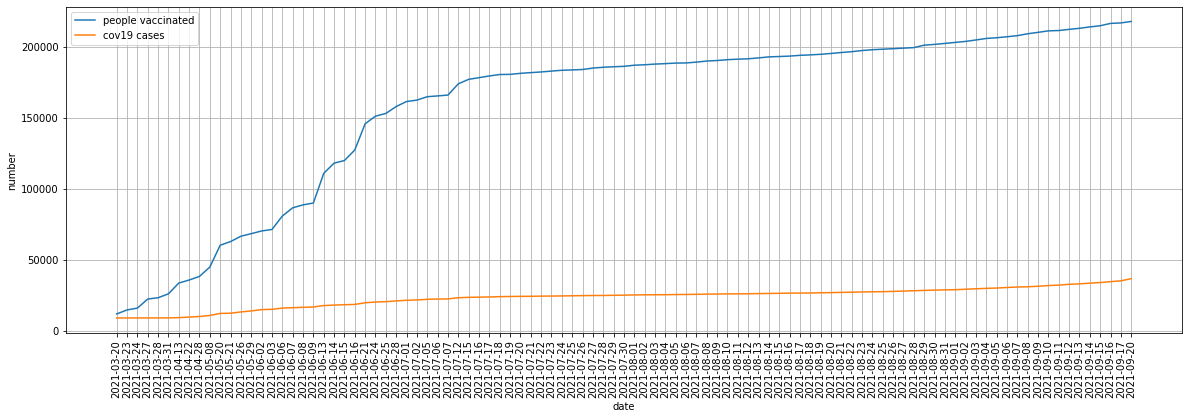

In [56]:
plt.figure(figsize=(20,6))
plt.plot(joined_table['people_vaccinated'],label='people vaccinated')
plt.plot(joined_table['Cumulative_cases'],label='cov19 cases')
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('number')
plt.legend()
plt.grid();

As can be seen, the trend of the injection chart is generally uptrend, but the infection chart is initially uptrend and is fixed in July. After that, the trend is upward but has a lower slope. July is the time when the vaccination is well done. At this time the number of injections has almost reached its maximum. The rate of injection appears to be the majority of the population at this time. Vaccination has led to an increase in the incidence rate towards stabilization and low changes. Here we see the effect of vaccination in reducing the incidence of Covid.